# Programming Session 7 - Introduction to Sequence Models 

The Objective of this session is to create a sequence model to predict the labels of the MNIST dataset

# 1. Numpy implementation of a standard RNN

In [3]:
# Import basic libraries
import matplotlib.pyplot as plt # for plotting 
import numpy as np # for manipulating arrays
import tensorflow as tf # for creating Neural Networks, we will use it to load data
plt.style.use('dark_background') # to adapt the colors to a dark background
from IPython.display import Image # for showing graphs from the lectures

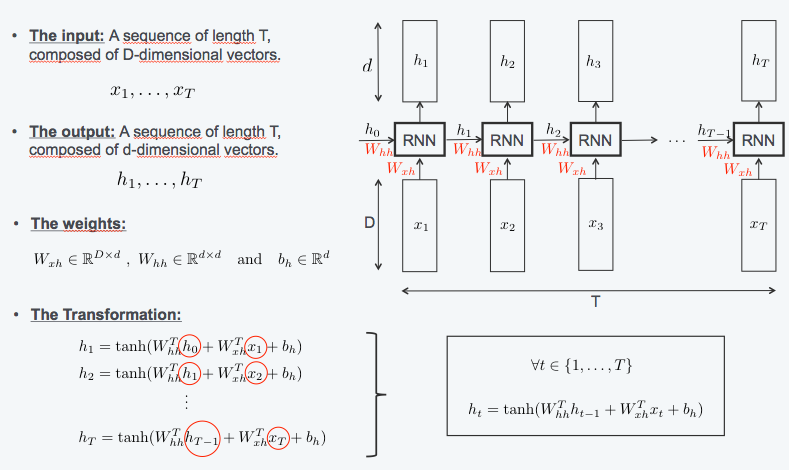

In [4]:
Image(filename='./images/StandardRNN.png',  width=1000) 

We have the following hyperparameters:

In [0]:
N = 1000
T = 100
D = 50
d = 20

Q1. Generate some random data of shape (N, T, D). 





In [0]:
data = np.random.random((N, T, D))

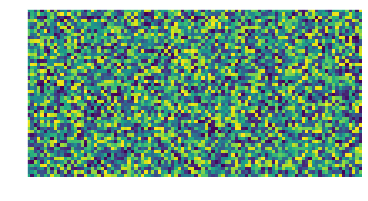

In [4]:
plt.imshow(data[0].T)

Q2. Create some random weights $W_{hh}, W_{xh}, b_h$

In [0]:
W_hh = np.random.random((d, d))
W_xh = np.random.random((D, d))
b_h = np.random.random((d,))

Q3. Generate the output tensor of shape (N, T, d) by creating the sequence $h_1, \dots, h_T$ associated with each sequence $x_1, \dots, x_T$. 

In [0]:
# Initilise the output tensor H
H = np.zeros((N, T, d))

# Loop through all the N samples (each sample is a sequence of length T with D-dimensional elements)
for i in range(N):
  # Get the input sequence x_1, ..., x_T
  X = data[i]
  # Initilise h_{t-1} 
  h_t_minus_one = np.zeros((d,))
  # Initilise the sequence h_1,..., h_T
  sequence_H = []
  # Loop through all the elements x_1, ...x_T
  for x_t in X:
    # h_t = tanh(W_{xh}^T x_t + W_{hh}^T h_{t-1} + b_h)
    h_t = np.tanh(W_xh.T.dot(x_t) + W_hh.T.dot(h_t_minus_one) + b_h)
    # Let's append the sequence_H list
    sequence_H.append(h_t)
    # h_t becomes the new h_{t-1}
    h_t_minus_one = h_t
  H[i] = np.asarray(sequence_H)


In [8]:
H.shape

(1000, 100, 20)

Q4. Plot the shape of the output:

(1000, 100, 20)

# 2. MNIST Classification using LSTMs

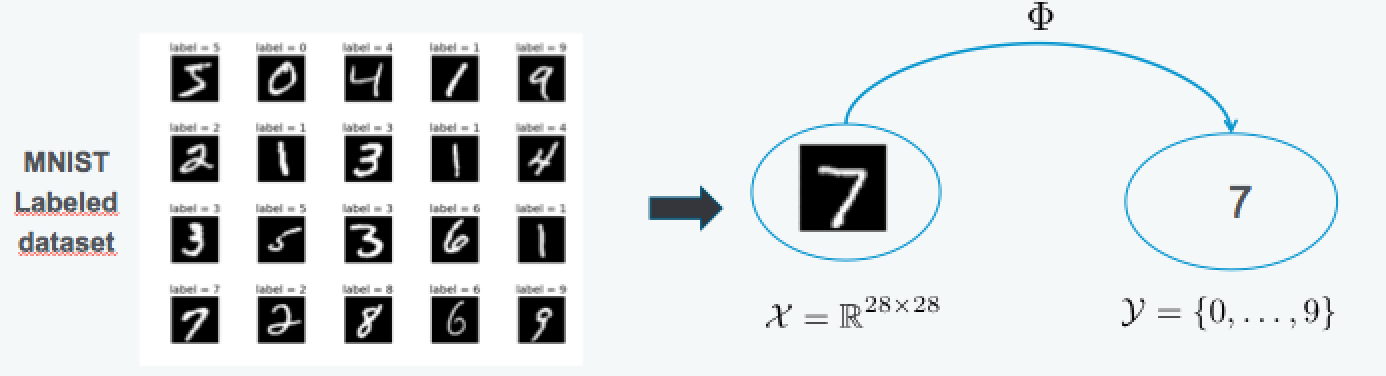

In [5]:
Image(filename='./images/Objective.png',  width=1000) 

We want to use the LSTM layer to classify the MNIST dataset.

The dataset is of shape (60000, 28, 28). 

Each sample is an image of shape (28, 28).

We can look at the image as a sequence of length T = 28, where each element is of dimension D = 28

## 2.1 Loading the MNIST dataset

Q5. Load the MNIST dataset using `tf.keras.datasets.mnist.load_data`

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Q6. Plot the shape of the data

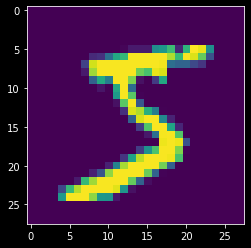

In [12]:
X_train.shape
plt.imshow(X_train[0])

Q7. Scale the feature train and test data by dividing each pixel element by 255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Q8. The targets are categories in $\{0, \dots, 9\}$. Create the tensor target of shape (N, 10) by one hot encoding the targets using `to_categorical` from `tensorflow.keras.utils`

(60000, 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Q9. Create the following model and train it using gradient descent

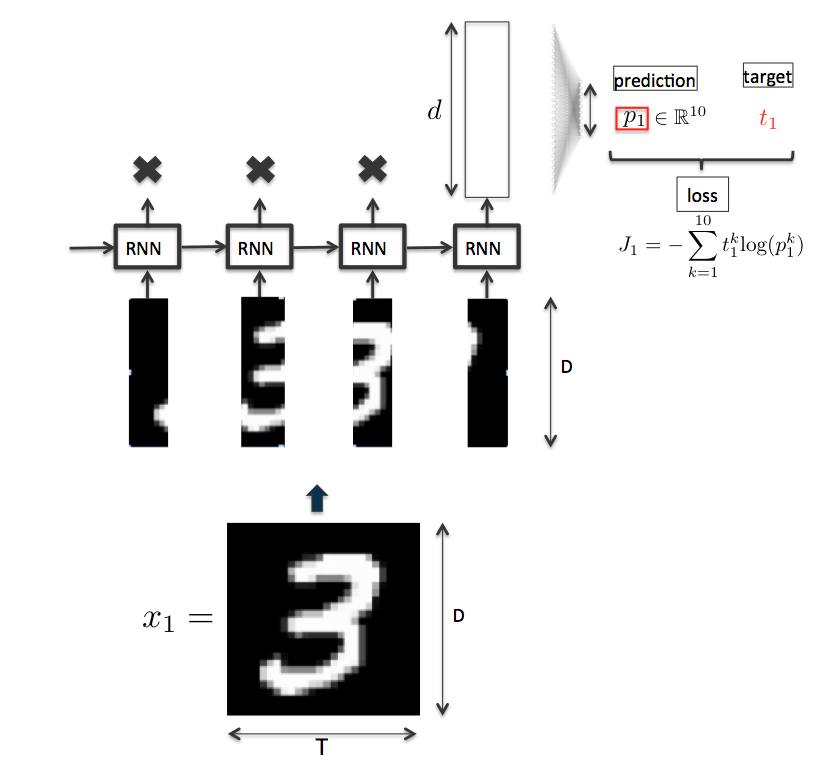

In [6]:
Image(filename='./images/RNN_image.png',  width=700)

(60000, 28, 28)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 28, 32)            7808      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 16,458
Trainable params: 16,458
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
657/657 [==============================] - 10s 15ms/step - loss: 0.1262 - accuracy: 0.9626 - val_loss: 0.1233 - val_accuracy: 0.9635
Epoch 2/10
657/657 [==============================] - 10s 15ms/step - loss: 0.1143 - accuracy: 0.9669 - val_loss: 0.1419 - val_accuracy: 0.9574
Epoch 3/10
657/657 [==============================] - 10s 15ms/step - loss: 0.1017 - accuracy: 0.9700 - val_loss: 0.1060 - val_accuracy: 0.9696
Epoch 4/10
657/657 [==============================] - 10s 15ms/step - loss: 0.0956 - accuracy: 0.9724 - val_loss: 0.1103 - val_accuracy: 0.9677
Epoch 5/10
657/657 [==============================] - 10s 15ms/step - loss: 0.0875 - accuracy: 0.9740 - val_loss: 0.0986 - val_accuracy: 0.9714
Epoch 6/10
657/657 [==============================] - 10s 15ms/step - loss: 0.0818 - accuracy: 0.9750 - val_loss: 0.1019 - val_accuracy: 0.9712
Epoch 7/10
657/657 [==============================] - 10s 15ms/step - loss: 0.0756 - accuracy: 0.9777 - val_loss: 0.1003 - val_accuracy:

Q10. Plot the training and the validation loss and the training and the validation accuracy

# Summary

In this programming session, we've learned:

* To code the RNN layer using numpy to understand how data is transformed.
* To perform a classification task on data of shape (N, T, D) using the LSTMs. 



